In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
images0 = np.load("data/fold0/images.npy")
images1 = np.load("data/fold1/images.npy")
images2 = np.load("data/fold2/images.npy")

images = np.concatenate((images0, images1, images2), axis=0)
images.shape

(7901, 256, 256, 3)

In [3]:
masks0 = np.load("data/fold0/masks.npy")
masks1 = np.load("data/fold1/masks.npy")
masks2 = np.load("data/fold2/masks.npy")

masks = np.concatenate((masks0, masks1, masks2), axis=0)
masks.shape

(7901, 256, 256, 6)

In [4]:
def display_channels(image, mask, grayscale=False):
    num_channels = mask.shape[2]
    fig, axes = plt.subplots(1, num_channels + 1, figsize=(15, 5))

    if grayscale == False:
        if image.dtype != np.uint8:
            image = image.astype(np.uint8)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    axes[0].imshow(image)
    axes[0].set_title('Original Image')
    axes[0].axis('off')
    for i in range(1, num_channels + 1):
        axes[i].imshow(mask[:, :, i - 1])
        axes[i].set_title(f'Channel {i}')
        axes[i].axis('off')

    plt.show()

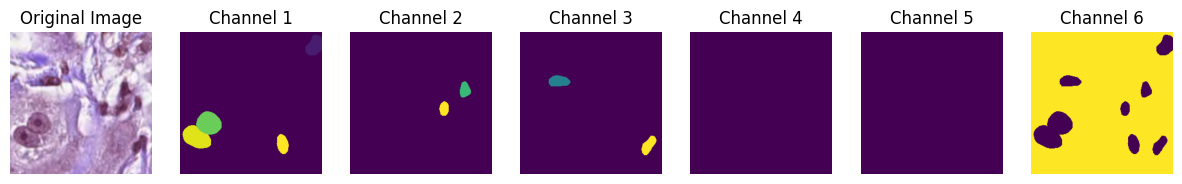

In [5]:
display_channels(images[0],masks[0])

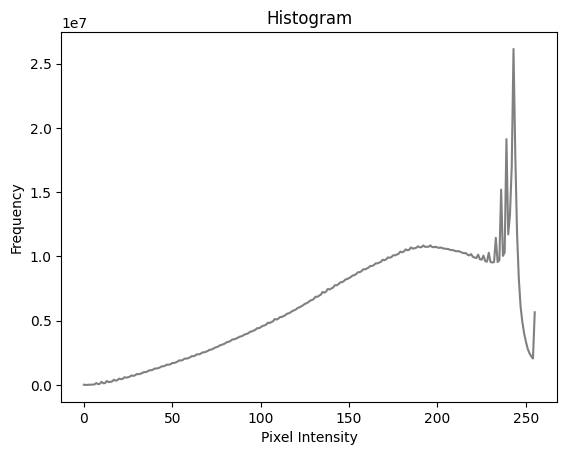

In [6]:
hist, bins = np.histogram(images.flatten(), 256, [0, 256])


plt.plot(hist, color='gray')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.title('Histogram')
plt.show()

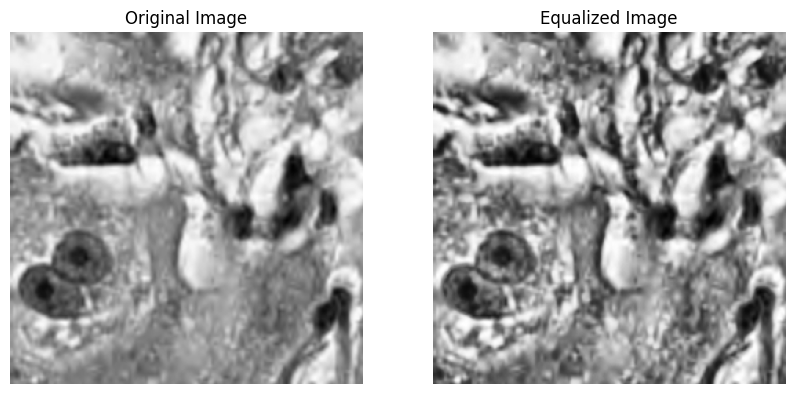

In [7]:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))

equalized_image = []
for img in images:

    equalized_image.append(clahe.apply(cv2.cvtColor(img.astype(np.uint8), cv2.COLOR_BGR2GRAY)))
equalized_image = np.array(equalized_image)


plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(images[0].astype(np.uint8), cv2.COLOR_BGR2GRAY), cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(equalized_image[0], cmap='gray')
plt.title('Equalized Image')
plt.axis('off')

plt.show()

In [8]:
images = equalized_image
del equalized_image

In [9]:
def apply_zscore_normalization(image):
    mean, std = cv2.meanStdDev(images[0])
    mean = np.round(mean[0][0], 3)
    std = np.round(std[0][0], 3)
    image = image.astype(np.float32)
    normalized_image = (image - mean) / std
    print(normalized_image)
    return normalized_image

images_normalized = apply_zscore_normalization(images.copy())

[[[-0.02396571 -0.02396571  0.04544981 ...  0.16692697  0.27105026
    0.39252742]
  [-0.02396571 -0.02396571  0.04544981 ...  0.16692697  0.27105026
    0.39252742]
  [ 0.09751145  0.09751145  0.14957309 ...  0.30575802  0.42723518
    0.4966507 ]
  ...
  [-1.18667569 -1.18667569 -0.90901361 ... -1.09990629 -1.25609121
   -1.34286061]
  [-1.08255241 -1.08255241 -0.70076704 ... -1.22138345 -1.25609121
   -1.34286061]
  [-1.25609121 -1.25609121 -0.90901361 ... -1.29079897 -1.25609121
   -1.29079897]]

 [[-0.02396571  0.06280369  0.11486533 ...  0.72225115  0.99991323
    1.22551367]
  [-0.02396571  0.06280369  0.11486533 ...  0.72225115  0.99991323
    1.22551367]
  [ 0.14957309  0.20163474  0.20163474 ...  0.68754338  0.94785159
    1.13874427]
  ...
  [-0.59664376 -0.26692003  0.34046578 ...  0.61812786  0.70489727
    0.80902055]
  [-0.59664376 -0.30162779  0.34046578 ...  0.42723518  0.5834201
    0.70489727]
  [-0.59664376 -0.33633555  0.37517354 ...  0.25369638  0.42723518
    0.5

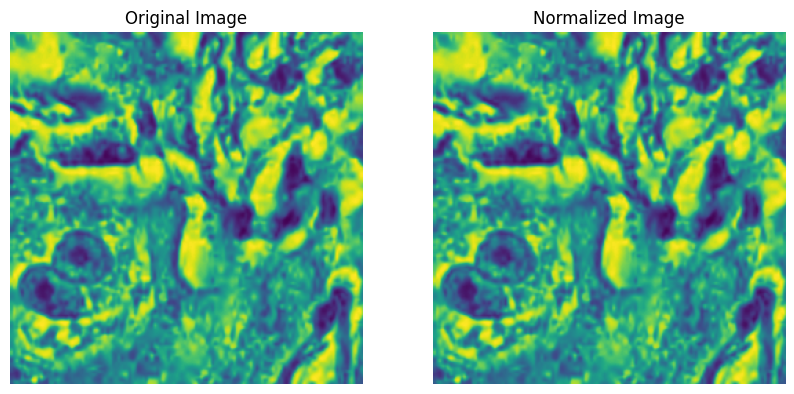

In [10]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(images[0])
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(images_normalized[0])
plt.title('Normalized Image')
plt.axis('off')

plt.show()

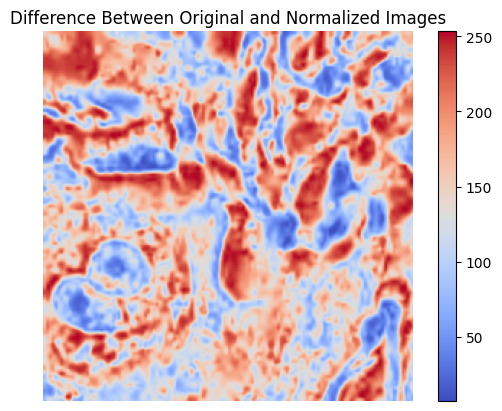

In [11]:
plt.imshow(images[0] - images_normalized[0], cmap='coolwarm')
plt.colorbar()
plt.title('Difference Between Original and Normalized Images')
plt.axis('off')
plt.show()

In [12]:
images = images_normalized
del images_normalized

In [13]:
masks_binary = [cv2.threshold(mask, 0, 255, cv2.THRESH_BINARY)[1] for mask in masks]

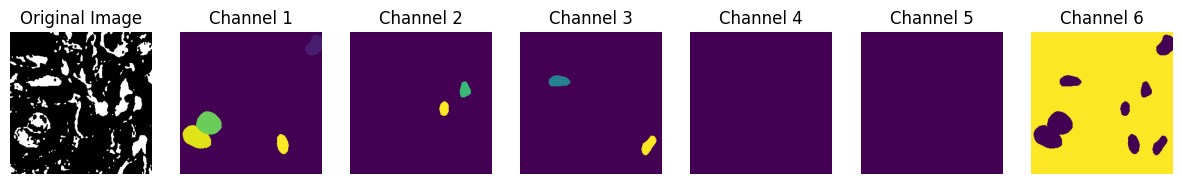

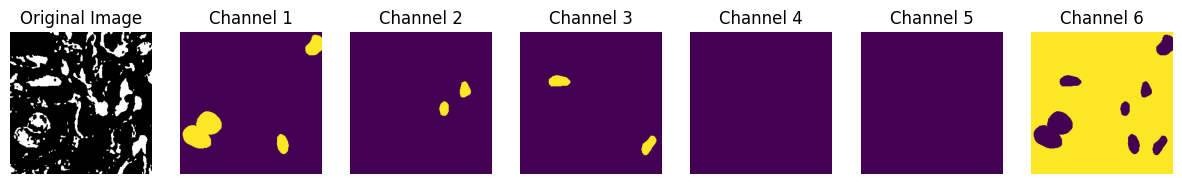

In [14]:
display_channels(images[0], masks[0])
display_channels(images[0], masks_binary[0])

In [15]:
masks = masks_binary
del masks_binary